**Example 6.2 Trapezoidal local error (python)**          
Let's write a python program to compare the trapezoidal approximation to the exact result, for various value of $\delta$

In [15]:
#!/usr/bin/env python3 
import numpy as np 

# function to return exact result at x=4 for some dx 
def exact(dx):
    return 0.5*(dx + np.sin(4) - np.sin(4+dx))

# trapezoidal approximation at x=4 for some dx 
def trapezoid(dx):
    return 0.5*dx*(np.sin(2)**2 + np.sin(2+0.5*dx)**2)

# calculate the local error for various dx 
local_error = []
for dx in [0.001, 0.01, 0.1,0.2,0.5,1]:
    local_error.append(np.abs(trapezoid(dx)-exact(dx)))

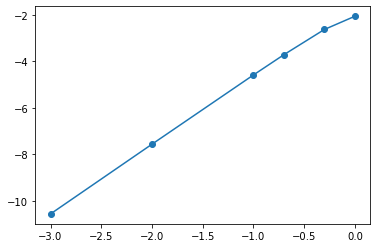

In [19]:
import matplotlib.pyplot as plt 
plt.plot(np.log10([0.001, 0.01, 0.1,0.2,0.5,1]),
         np.log10(local_error),'-o')

[[0.001, 2.7219523726987327e-11],
 [0.01, 2.707707615935695e-08],
 [0.1, 2.5618693318976704e-05],
 [0.2, 0.00019141644261430613],
 [0.5, 0.0023088836417853864],
 [1, 0.00856553082750866]]

## Simpson's rule

**Example 6.4** 

Simpson's rule for normalisation

In [29]:
# solution 1
import numpy as np 

# define the probability function 
prob = lambda x: np.abs(np.exp(-x**2/2)**2)

# grid spacing and grid points 
dx = 0.01 
a = -5; b = 5 
N = int((b-a)/dx  + 1)

# Simpson's rule using function calls 
A = prob(a) + prob(b)

for n in range(1,N):
    # even terms 
    if n%2 == 0:
        A += 4*prob(a + n*dx)
    else:
        A += 2*prob(a + n*dx)
A *= dx/3 

# normalize the wavefunction
psiNorm = lambda x: np.exp(-x**2/2)/np.sqrt(A)
print(psiNorm(x))

[2.79918439e-06 2.94255451e-06 3.09295853e-06 ... 3.09295853e-06
 2.94255451e-06 2.79918439e-06]


In [25]:
# solution 2 
'''
we can represent the wavefunction to be normalissed as an array,
and use array slicing to perform the summation
'''
import numpy as np 
# create the wavefunction grid 

dx = 0.01 
x = np.arange(-5,5+dx, dx)
psi = np.exp(-x**2/2)
prob = np.abs(psi)**2 

# Simpson's rule using numpy slicing 
A = (dx/3)*(prob[0] + 4*np.sum(prob[1:-1:2])
            + 2*np.sum(prob[2:-1:2]) + prob[-1])

# normalise the wavefunction 
psiNorm = psi/np.sqrt(A)
psiNorm

array([2.79918439e-06, 2.94255451e-06, 3.09295853e-06, ...,
       3.09295853e-06, 2.94255451e-06, 2.79918439e-06])